**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np


**Load the Data Sets**

In [2]:


customers_path = "/content/Customers.csv"
products_path = "/content/Products.csv"
transactions_path = "/content/Transactions.csv"

customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

print(customers_df.head())
print(products_df.head())
print(transactions_df.head())

print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(transactions_df.isnull().sum())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

**Task 1: Exploratory Data Analysis (EDA)**

In [ ]:


from tabulate import tabulate

print("Customers Dataset:")
print(tabulate(customers_df.head(), headers='keys', tablefmt='grid'))

print("\nProducts Dataset:")
print(tabulate(products_df.head(), headers='keys', tablefmt='grid'))

print("\nTransactions Dataset:")
print(tabulate(transactions_df.head(), headers='keys', tablefmt='grid'))


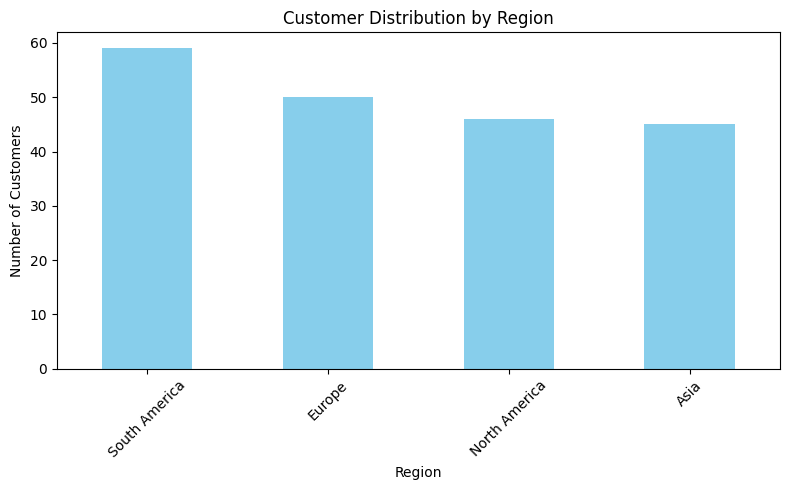

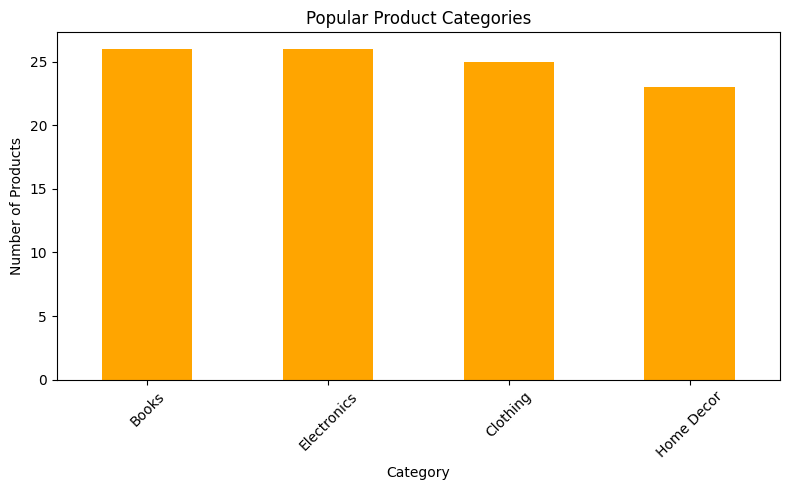

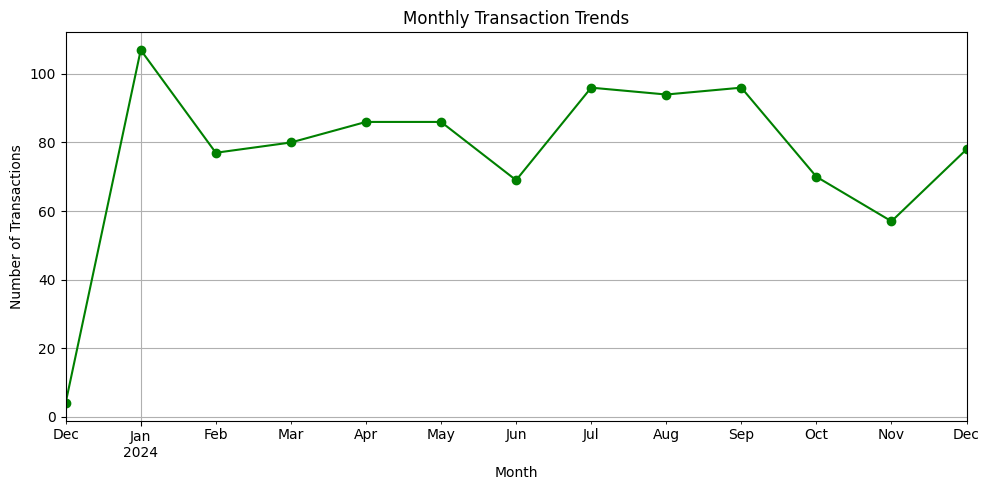

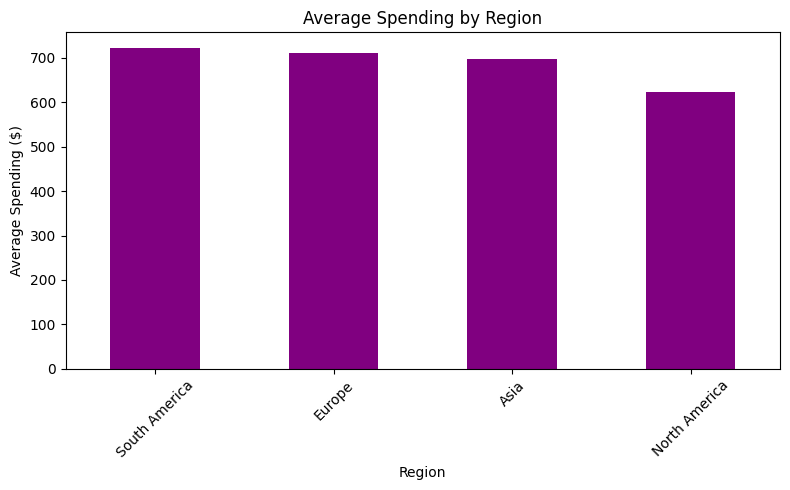

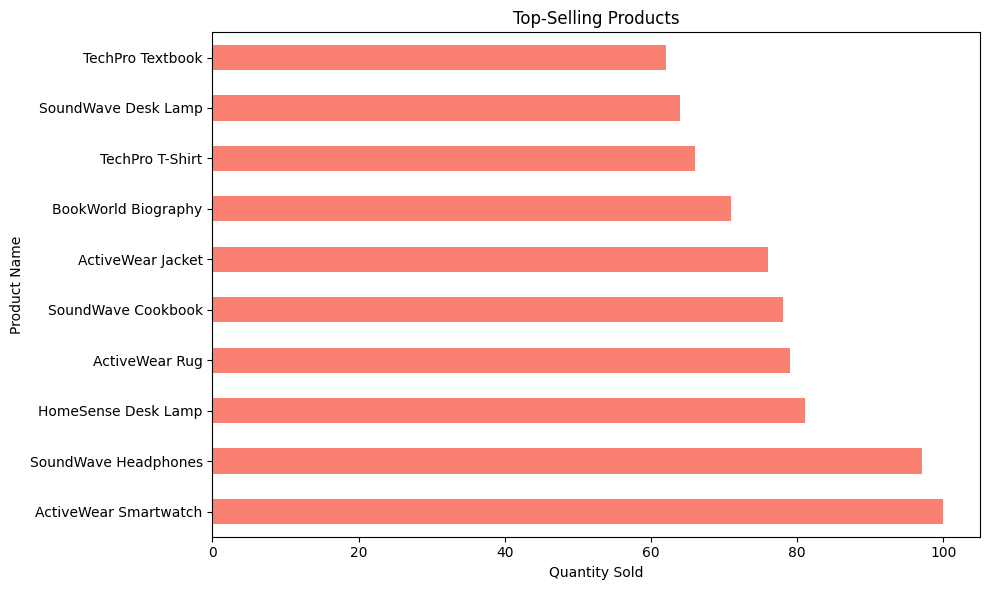

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Merge datasets for analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Customer Distribution by Region
region_distribution = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
region_distribution.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('customer_distribution_by_region.png')
plt.show()

# Popular Product Categories
category_distribution = products_df['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_distribution.plot(kind='bar', color='orange')
plt.title('Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('popular_product_categories.png')
plt.show()

# Monthly Transaction Trends
merged_df['TransactionMonth'] = pd.to_datetime(merged_df['TransactionDate']).dt.to_period('M')
monthly_transactions = merged_df.groupby('TransactionMonth').size()
plt.figure(figsize=(10, 5))
monthly_transactions.plot(kind='line', marker='o', color='green')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid()
plt.tight_layout()
plt.savefig('monthly_transaction_trends.png')
plt.show()

# Average Spending by Region
avg_spending_region = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_spending_region.plot(kind='bar', color='purple')
plt.title('Average Spending by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('average_spending_by_region.png')
plt.show()

# Top-Selling Products
top_selling_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='barh', color='salmon')
plt.title('Top-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('top_selling_products.png')
plt.show()
